In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

import pickle

In [2]:
# import data from Fresno airport (closest to 0021 zip 93610)
weather = pd.read_csv('ca_energy_data/NOAA_weather_data/1961595.csv')

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,25,26,27,28,34,43,56,71,72,75,76,88,89,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
weather.shape

(99738, 124)

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99738 entries, 0 to 99737
Columns: 124 entries, STATION to WindEquipmentChangeDate
dtypes: float64(75), int64(5), object(44)
memory usage: 94.4+ MB


In [5]:
weather.head(5)

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72389093193,2011-01-01T00:53:00,FM-15,7,NaN,SE,1,mi,"TEMP, PRECIP",338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-04-03
1,72389093193,2011-01-01T01:53:00,FM-15,7,NaN,SE,1,mi,"TEMP, PRECIP",338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-04-03
2,72389093193,2011-01-01T02:53:00,FM-15,7,NaN,SE,1,mi,"TEMP, PRECIP",338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-04-03
3,72389093193,2011-01-01T03:53:00,FM-15,7,NaN,SE,1,mi,"TEMP, PRECIP",338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-04-03
4,72389093193,2011-01-01T04:00:00,FM-12,4,NaN,SE,1,mi,"TEMP, PRECIP",338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-04-03


In [6]:
for i in weather.columns:
    print(i)

STATION
DATE
REPORT_TYPE
SOURCE
AWND
BackupDirection
BackupDistance
BackupDistanceUnit
BackupElements
BackupElevation
BackupElevationUnit
BackupEquipment
BackupLatitude
BackupLongitude
BackupName
CDSD
CLDD
DSNW
DailyAverageDewPointTemperature
DailyAverageDryBulbTemperature
DailyAverageRelativeHumidity
DailyAverageSeaLevelPressure
DailyAverageStationPressure
DailyAverageWetBulbTemperature
DailyAverageWindSpeed
DailyCoolingDegreeDays
DailyDepartureFromNormalAverageTemperature
DailyHeatingDegreeDays
DailyMaximumDryBulbTemperature
DailyMinimumDryBulbTemperature
DailyPeakWindDirection
DailyPeakWindSpeed
DailyPrecipitation
DailySnowDepth
DailySnowfall
DailySustainedWindDirection
DailySustainedWindSpeed
DailyWeather
HDSD
HTDD
HeavyFog
HourlyAltimeterSetting
HourlyDewPointTemperature
HourlyDryBulbTemperature
HourlyPrecipitation
HourlyPresentWeatherType
HourlyPressureChange
HourlyPressureTendency
HourlyRelativeHumidity
HourlySeaLevelPressure
HourlySkyConditions
HourlyStationPressure
HourlyVisib

In [7]:
weather['DATE'] = [dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S') for x in weather['DATE']]

In [68]:
keep_cols = ['DATE',
            'HourlyAltimeterSetting',
            'HourlyDewPointTemperature',
            'HourlyDryBulbTemperature',
            'HourlyPrecipitation',
            'HourlyPresentWeatherType',
            'HourlyPressureChange',
            'HourlyPressureTendency',
            'HourlyRelativeHumidity',
            'HourlySeaLevelPressure',
            'HourlySkyConditions',
            'HourlyStationPressure',
            'HourlyVisibility',
            'HourlyWetBulbTemperature',
            'HourlyWindDirection',
            'HourlyWindGustSpeed',
            'HourlyWindSpeed',
            ]
weather1 = weather[keep_cols]

In [30]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99738 entries, 0 to 99737
Data columns (total 17 columns):
DATE                         99738 non-null datetime64[ns]
HourlyAltimeterSetting       83609 non-null float64
HourlyDewPointTemperature    96296 non-null object
HourlyDryBulbTemperature     96312 non-null object
HourlyPrecipitation          78435 non-null object
HourlyPresentWeatherType     19497 non-null object
HourlyPressureChange         38274 non-null float64
HourlyPressureTendency       38274 non-null float64
HourlyRelativeHumidity       96295 non-null float64
HourlySeaLevelPressure       90390 non-null float64
HourlySkyConditions          78966 non-null object
HourlyStationPressure        95567 non-null float64
HourlyVisibility             96379 non-null object
HourlyWetBulbTemperature     95516 non-null float64
HourlyWindDirection          95804 non-null object
HourlyWindGustSpeed          2098 non-null float64
HourlyWindSpeed              96142 non-null object
dtypes: d

In [31]:
weather1.head(5)

,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,2011-01-01 00:53:00,30.15,33,41,0.00,NaN,-0.01,0.0,73.0,30.15,BKN:07 90 OVC:08 110,29.80,10.00,38.0,090,NaN,5
1,2011-01-01 01:53:00,30.16,32,42,0.00,NaN,NaN,NaN,68.0,30.16,BKN:07 95 OVC:08 110,29.80,10.00,38.0,100,NaN,5
2,2011-01-01 02:53:00,30.14,33,43,0.00,NaN,NaN,NaN,68.0,30.14,BKN:07 75 OVC:08 110,29.78,10.00,39.0,090,NaN,8
3,2011-01-01 03:53:00,30.13,32,43,0.00,NaN,0.02,8.0,65.0,30.13,BKN:07 75 OVC:08 95,29.78,10.00,38.0,110,NaN,5
4,2011-01-01 04:00:00,NaN,32,43,NaN,NaN,0.02,8.0,65.0,30.13,NaN,29.76,9.94,38.0,110,NaN,5


In [32]:
weather1.iloc[0]

DATE                          2011-01-01 00:53:00
HourlyAltimeterSetting                      30.15
HourlyDewPointTemperature                      33
HourlyDryBulbTemperature                       41
HourlyPrecipitation                          0.00
HourlyPresentWeatherType                      NaN
HourlyPressureChange                        -0.01
HourlyPressureTendency                          0
HourlyRelativeHumidity                         73
HourlySeaLevelPressure                      30.15
HourlySkyConditions          BKN:07 90 OVC:08 110
HourlyStationPressure                        29.8
HourlyVisibility                            10.00
HourlyWetBulbTemperature                       38
HourlyWindDirection                           090
HourlyWindGustSpeed                           NaN
HourlyWindSpeed                                 5
Name: 0, dtype: object

In [33]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99738 entries, 0 to 99737
Data columns (total 17 columns):
DATE                         99738 non-null datetime64[ns]
HourlyAltimeterSetting       83609 non-null float64
HourlyDewPointTemperature    96296 non-null object
HourlyDryBulbTemperature     96312 non-null object
HourlyPrecipitation          78435 non-null object
HourlyPresentWeatherType     19497 non-null object
HourlyPressureChange         38274 non-null float64
HourlyPressureTendency       38274 non-null float64
HourlyRelativeHumidity       96295 non-null float64
HourlySeaLevelPressure       90390 non-null float64
HourlySkyConditions          78966 non-null object
HourlyStationPressure        95567 non-null float64
HourlyVisibility             96379 non-null object
HourlyWetBulbTemperature     95516 non-null float64
HourlyWindDirection          95804 non-null object
HourlyWindGustSpeed          2098 non-null float64
HourlyWindSpeed              96142 non-null object
dtypes: d

#### Data cleaning object columns
- HourlyPrecipitation - remove nan and s suffix (not sure what it means)
- HourlyDewPointTemperature - remove nan and s suffix (not sure what it means)
- HourlyDryBulbTemperature - remove nan and s suffix (not sure what it means)
- HourlyPrecipitation - remove nan, s suffix, and T (trace - set to zero)
- HourlyVisibility - remove nan and V suffix (not sure what it means)
- HourlyWindDirection - remove nan and VRB (not sure what it means)
<br><br>
HourlySkyConditions

<br>
Do not include:<br>
- HourlyPresentWeatherType (lots of nans)
- HourlyWindSpeed (lots of nans)

In [ ]:
def col_clean(x):
    if x[:-1] =='s'

In [71]:
import re
remove_chars = lambda x: re.sub('s|V', '', str(x))
replace_trace = lambda x: re.sub('T|RB','0', str(x))

# weather1['HourlyPrecipitation'] = weather1['HourlyPrecipitation'].map(remove_chars).map(replace_trace)
# weather1['HourlyPrecipitation'].replace(to_replace='nan',value=np.nan,inplace=True)
# weather1['HourlyPrecipitation'] = pd.to_numeric(weather1['HourlyPrecipitation'])

for col in ['HourlyDewPointTemperature','HourlyDryBulbTemperature','HourlyPrecipitation','HourlyVisibility',
            'HourlyWindDirection']:
    weather1[col] = weather1[col].map(remove_chars).map(replace_trace)
    weather1[col].replace(to_replace='nan',value=np.nan,inplace=True)
    weather1[col] = pd.to_numeric(weather1[col])

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [66]:
# for i in set(weather1['HourlyPrecipitation']):
#     print(i)

In [77]:
weather1.iloc[99734]

DATE                         2019-11-21 10:00:00
HourlyAltimeterSetting                       NaN
HourlyDewPointTemperature                     44
HourlyDryBulbTemperature                      60
HourlyPrecipitation                          NaN
HourlyPresentWeatherType                     NaN
HourlyPressureChange                       -0.06
HourlyPressureTendency                         1
HourlyRelativeHumidity                        56
HourlySeaLevelPressure                     29.88
HourlySkyConditions                           57
HourlyStationPressure                      29.51
HourlyVisibility                            9.94
HourlyWetBulbTemperature                      52
HourlyWindDirection                          120
HourlyWindGustSpeed                          NaN
HourlyWindSpeed                                9
Name: 99734, dtype: object

In [78]:
weather1['sky_last_layer'] = [str(x)[str(x).rfind(':'):] for x in weather1['HourlySkyConditions']]
weather1['cloud_layer'] = [str(x)[str(x).find(':')+1:str(x).find(':')+3] if str(x).find(':')!= -1 else np.NaN for x in weather1['sky_last_layer']]
weather1['cloud_base_height'] = [str(x)[str(x).rfind(' '):] if str(x).find(' ')!= -1 else np.NaN for x in weather1['sky_last_layer']]

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [387]:
# weather1.iloc[11:21]
# for i in set(weather1['cloud_base_height']):
#     print(i)

In [79]:
weather1[['HourlySkyConditions','sky_last_layer','cloud_layer','cloud_base_height']].loc[weather1['cloud_layer']=='00']
#consider changing cloud base height on clear skies to be super high number instead of NaN

,HourlySkyConditions,sky_last_layer,cloud_layer,cloud_base_height
99,CLR:00,:00,00,NaN
105,CLR:00,:00,00,NaN
116,CLR:00,:00,00,NaN
130,CLR:00,:00,00,NaN
380,CLR:00,:00,00,NaN
...,...,...,...,...
99688,CLR:00,:00,00,NaN
99690,CLR:00,:00,00,NaN
99691,CLR:00,:00,00,NaN
99693,CLR:00,:00,00,NaN


In [80]:
weather1[['DATE','HourlySkyConditions','sky_last_layer','cloud_layer','cloud_base_height']].iloc[80:90]

,DATE,HourlySkyConditions,sky_last_layer,cloud_layer,cloud_base_height
80,2011-01-03 06:51:00,FEW:02 15 OVC:08 49,:08 49,08,49
81,2011-01-03 06:53:00,OVC:08 49,:08 49,08,49
82,2011-01-03 07:53:00,BKN:07 40 OVC:08 50,:08 50,08,50
83,2011-01-03 08:53:00,SCT:04 50 BKN:07 60,:07 60,07,60
84,2011-01-03 09:53:00,FEW:02 25 SCT:04 50,:04 50,04,50
85,2011-01-03 10:00:00,NaN,n,NaN,NaN
86,2011-01-03 10:53:00,SCT:04 40,:04 40,04,40
87,2011-01-03 11:53:00,SCT:04 40,:04 40,04,40
88,2011-01-03 12:53:00,SCT:04 45,:04 45,04,45
89,2011-01-03 13:53:00,SCT:04 45,:04 45,04,45


In [81]:
weather1['cloud_layer'] = [float(x) for x in weather1['cloud_layer']]
weather1['cloud_base_height'] = [float(x) for x in weather1['cloud_base_height']]

/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99738 entries, 0 to 99737
Data columns (total 20 columns):
DATE                         99738 non-null datetime64[ns]
HourlyAltimeterSetting       83609 non-null float64
HourlyDewPointTemperature    96296 non-null float64
HourlyDryBulbTemperature     96312 non-null float64
HourlyPrecipitation          78435 non-null float64
HourlyPresentWeatherType     19497 non-null object
HourlyPressureChange         38274 non-null float64
HourlyPressureTendency       38274 non-null float64
HourlyRelativeHumidity       96295 non-null float64
HourlySeaLevelPressure       90390 non-null float64
HourlySkyConditions          78966 non-null object
HourlyStationPressure        95567 non-null float64
HourlyVisibility             96379 non-null float64
HourlyWetBulbTemperature     95516 non-null float64
HourlyWindDirection          95804 non-null float64
HourlyWindGustSpeed          2098 non-null float64
HourlyWindSpeed              96142 non-null object
sky_

#### Sky conditions
Sky Conditions: A report of each cloud layer (up to 3) giving the following information.
Each layer given in the following format: ccc:ll-xxx where:<br>
 1) ccc is Coverage: CLR (clear sky), FEW (few clouds), SCT (scattered clouds), BKN (broken clouds), OVC
(overcast), VV (obscured sky), 10 (partially obscured sky).<br>
2) ll is Layer amount used in conjunction with coverage code above. Given in eighths (aka “oktas”) of sky
covered by cloud. Specifically 00-08 indicates the number of oktas that cloud layer takes up in the total sky. 00
corresponds to CLR, 01-02 corresponds to FEW, 03-04 corresponds to SCT, 05-07 corresponds to BKN and 08
corresponds to OVC. 09 indicates an obscuration (i.e. the sky cannot be seen due to obscuring phenomena - e.g.
due to smoke, fog, etc.). 10 indicates a portion of the sky is obscured (i.e. partial obscuration). For additional
information see Integrated Surface Data documentation. (http://www1.ncdc.noaa.gov/pub/data/ish/ish-formatdocument.pdf) in Cloud and Solar Data portion of Additional Data Section.<br>
3) xxx is the Cloud base height at lowest point of layer. In the case of an obscuration this value represents the
vertical visibility from the point of observation. Given in hundreds of feet (e.g. 50 = 5000 ft, 120 = 12000 feet).
In some cases a cloud base height will be given without the corresponding cloud amount. In these case the cloud
amount is missing or not reported.<br>
Up to 3 layers can be reported however by definition when clear skies are reported it will be reported as only
one layer as CLR-00. Obscurations will be reported as VV-xx where xx is the vertical visibility into the
obscuring phenomena.<br>
Additional information about cloud cover data: The Integrated Surface Data documentation further defines the
coverage of a layer in oktas (i.e. eighths) or tenths of sky covered by cloud as per the following table:<br>
0 oktas/0 tenths is defined as CLR (clear sky)<br>
1-2 oktas/1-3 tenths is defined as FEW (few clouds)<br>
3-4 oktas/4-5 tenths is defined as SCT (scattered clouds)<br>
5 to less than 8/6 to less than 10 is defined as BKN (broken clouds)<br>
8 oktas/10 tenths is defined as OVC (overcast)<br>
Partial obscuration - sky is partially obscured and therefore cloud coverage cannot be fully determined<br>
Total obscuration - sky is completely obscured and therefore cloud coverage is not available<br>
Note: Since up to 3 cloud layers can be reported, the full state of the sky can best be determined by the
contraction given for the last layer. In other words if three layers are reported and the third layer uses BKN then the total state of sky is BKN which is similar in definition to “mostly cloudy.” OVC is similar to “cloudy” or overcast and FEW or SCT is similar to “partly cloudy.” It should also be noted that in cases where there are
more than 3 cloud layers, the highest layers will not be reported.<br> 
For additional information see Integrated Surface Data documentation (http://www1.ncdc.noaa.gov: pub: data:
ish: ish-format-document.pdf) in Cloud and Solar Data portion of Additional Data Section.

In [83]:
# Resample to hourly
weather1.index = weather1['DATE']
weather2 = weather1.resample('H').mean()

In [84]:
weather2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77917 entries, 2011-01-01 00:00:00 to 2019-11-21 12:00:00
Freq: H
Data columns (total 15 columns):
HourlyAltimeterSetting       77871 non-null float64
HourlyDewPointTemperature    77843 non-null float64
HourlyDryBulbTemperature     77852 non-null float64
HourlyPrecipitation          77351 non-null float64
HourlyPressureChange         38268 non-null float64
HourlyPressureTendency       38268 non-null float64
HourlyRelativeHumidity       77843 non-null float64
HourlySeaLevelPressure       77686 non-null float64
HourlyStationPressure        77485 non-null float64
HourlyVisibility             77879 non-null float64
HourlyWetBulbTemperature     77444 non-null float64
HourlyWindDirection          77817 non-null float64
HourlyWindGustSpeed          1950 non-null float64
cloud_layer                  71242 non-null float64
cloud_base_height            51878 non-null float64
dtypes: float64(15)
memory usage: 9.5 MB


In [85]:
# Drop variables that are frequently missing
drop_cols = ['HourlyPressureChange','HourlyPressureTendency','HourlyWindGustSpeed']
weather2.drop(drop_cols,axis=1,inplace=True)

In [86]:
def cloud_fix(x):
    if x['cloud_layer'] == 0:
        return 999
    else:
        return x['cloud_base_height']

In [87]:
# For cloud base height, set height to high number of cloud layer is 0
weather2['cloud_base_height'] = weather2.apply(cloud_fix,axis=1)
weather2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77917 entries, 2011-01-01 00:00:00 to 2019-11-21 12:00:00
Freq: H
Data columns (total 12 columns):
HourlyAltimeterSetting       77871 non-null float64
HourlyDewPointTemperature    77843 non-null float64
HourlyDryBulbTemperature     77852 non-null float64
HourlyPrecipitation          77351 non-null float64
HourlyRelativeHumidity       77843 non-null float64
HourlySeaLevelPressure       77686 non-null float64
HourlyStationPressure        77485 non-null float64
HourlyVisibility             77879 non-null float64
HourlyWetBulbTemperature     77444 non-null float64
HourlyWindDirection          77817 non-null float64
cloud_layer                  71242 non-null float64
cloud_base_height            71236 non-null float64
dtypes: float64(12)
memory usage: 7.7 MB


In [89]:
# Impute NaNs
cols = ['HourlyAltimeterSetting','HourlyDewPointTemperature','HourlyDryBulbTemperature',
        'HourlyPrecipitation','HourlyRelativeHumidity','HourlySeaLevelPressure','HourlyStationPressure',
        'HourlyVisibility','HourlyWetBulbTemperature','HourlyWindDirection','cloud_layer','cloud_base_height']

for col in cols:
    #fill in hours with daily avg
    weather2[col] = weather2[[col]].fillna(weather2.groupby(weather2.index.date).transform('mean'))
    #fill in days with monthly avg
    weather2[col] = weather2[[col]].fillna(weather2.groupby(weather2.index.month).transform('mean'))


In [90]:
weather2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77917 entries, 2011-01-01 00:00:00 to 2019-11-21 12:00:00
Freq: H
Data columns (total 12 columns):
HourlyAltimeterSetting       77917 non-null float64
HourlyDewPointTemperature    77917 non-null float64
HourlyDryBulbTemperature     77917 non-null float64
HourlyPrecipitation          77917 non-null float64
HourlyRelativeHumidity       77917 non-null float64
HourlySeaLevelPressure       77917 non-null float64
HourlyStationPressure        77917 non-null float64
HourlyVisibility             77917 non-null float64
HourlyWetBulbTemperature     77917 non-null float64
HourlyWindDirection          77917 non-null float64
cloud_layer                  77917 non-null float64
cloud_base_height            77917 non-null float64
dtypes: float64(12)
memory usage: 7.7 MB


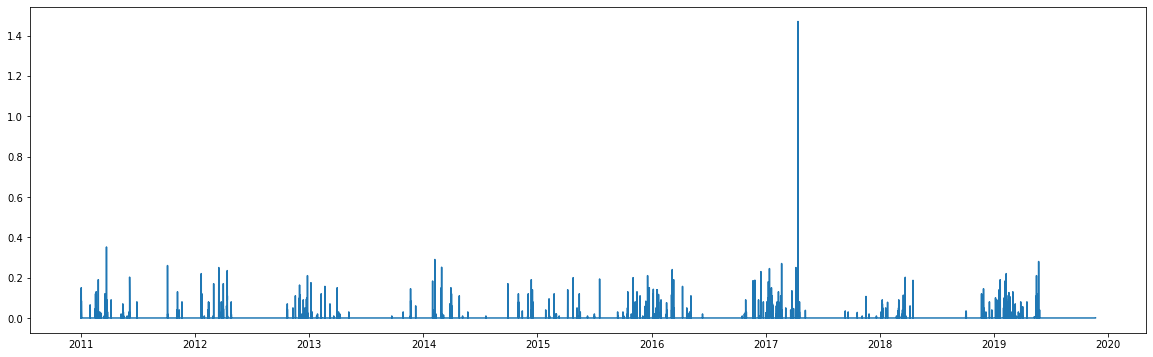

In [92]:
plt.figure(figsize=(20,6))
plt.plot(weather2.index,weather2['HourlyPrecipitation']);

In [93]:
weather2.head()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,cloud_layer,cloud_base_height
DATE,,,,,,,,,,,,
2011-01-01 00:00:00,30.15,33.0,41.0,0.0,73.0,30.150,29.800,10.00,38.0,90.0,8.0,110.0
2011-01-01 01:00:00,30.16,32.0,42.0,0.0,68.0,30.160,29.800,10.00,38.0,100.0,8.0,110.0
2011-01-01 02:00:00,30.14,33.0,43.0,0.0,68.0,30.140,29.780,10.00,39.0,90.0,8.0,110.0
2011-01-01 03:00:00,30.13,32.0,43.0,0.0,65.0,30.130,29.780,10.00,38.0,110.0,8.0,95.0
2011-01-01 04:00:00,30.12,32.0,43.0,0.0,65.0,30.125,29.765,9.97,38.0,110.0,8.0,120.0


In [94]:
weather2.shape

(77917, 12)

In [95]:
# Add missing date-times - not necessary we have complete index
new_index = pd.date_range('2011-01-01 00:00:00', '2019-11-21 12:00:00',freq='H')
len(new_index)

77917

In [96]:
# Daily sunrise/sunset
weather_daily = weather[['DATE','Sunrise','Sunset']][np.isnan(weather['Sunrise'])==False]
weather_daily.index = [x.date() for x in weather_daily['DATE']]
weather_daily.drop(['DATE'],axis=1,inplace=True)
weather_daily

,Sunrise,Sunset
2011-01-01,712.0,1654.0
2011-01-02,712.0,1654.0
2011-01-03,712.0,1655.0
2011-01-04,712.0,1656.0
2011-01-05,712.0,1657.0
...,...,...
2019-11-16,638.0,1649.0
2019-11-17,639.0,1648.0
2019-11-18,640.0,1648.0
2019-11-19,641.0,1647.0


In [97]:
# Add missing dates - missing 4
new_index = pd.date_range('2011-01-01 00:00:00', '2019-11-21 12:00:00',freq='D')
len(new_index)

3247

In [98]:
weather_daily1 = weather_daily.reindex(new_index,method='backfill')
weather_daily1 = weather_daily1[:-1]

In [99]:
weather_daily1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2011-01-01 to 2019-11-20
Freq: D
Data columns (total 2 columns):
Sunrise    3246 non-null float64
Sunset     3246 non-null float64
dtypes: float64(2)
memory usage: 76.1 KB


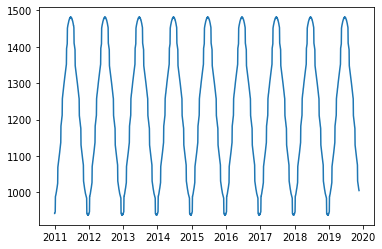

In [100]:
weather_daily1['sun_hours'] = weather_daily1['Sunset']-weather_daily1['Sunrise']
plt.plot(weather_daily1['sun_hours']);

In [101]:
weather_daily1['sunrise_time'] = [dt.datetime.strptime(str(int(x)), '%H%M') for x in weather_daily1['Sunrise']]
weather_daily1['sunrise_time'] = [int(format(x,"%H")) for x in weather_daily1['sunrise_time']]
weather_daily1['sunset_time'] = [dt.datetime.strptime(str(int(x)), '%H%M') for x in weather_daily1['Sunset']]
weather_daily1['sunset_time'] = [int(format(x,"%H")) for x in weather_daily1['sunset_time']]
weather_daily1[['sunrise_time','sunset_time']]

,sunrise_time,sunset_time
2011-01-01,7,16
2011-01-02,7,16
2011-01-03,7,16
2011-01-04,7,16
2011-01-05,7,16
...,...,...
2019-11-16,6,16
2019-11-17,6,16
2019-11-18,6,16
2019-11-19,6,16


In [102]:
replace_index = weather2.index

In [103]:
# merge to hourly data
weather3 = pd.merge(weather2,weather_daily1[['sunrise_time','sunset_time']],
                    left_on=weather2.index.date,right_on=weather_daily1.index.date,
                    how='left')
weather3.drop('key_0',axis=1,inplace=True)
weather3.index = weather2.index
weather3

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,cloud_layer,cloud_base_height,sunrise_time,sunset_time
DATE,,,,,,,,,,,,,,
2011-01-01 00:00:00,30.15,33.0,41.0,0.000000,73.0,30.150,29.800,10.00,38.0,90.0,8.000000,110.000000,7.0,16.0
2011-01-01 01:00:00,30.16,32.0,42.0,0.000000,68.0,30.160,29.800,10.00,38.0,100.0,8.000000,110.000000,7.0,16.0
2011-01-01 02:00:00,30.14,33.0,43.0,0.000000,68.0,30.140,29.780,10.00,39.0,90.0,8.000000,110.000000,7.0,16.0
2011-01-01 03:00:00,30.13,32.0,43.0,0.000000,65.0,30.130,29.780,10.00,38.0,110.0,8.000000,95.000000,7.0,16.0
2011-01-01 04:00:00,30.12,32.0,43.0,0.000000,65.0,30.125,29.765,9.97,38.0,110.0,8.000000,120.000000,7.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-21 08:00:00,29.87,44.0,55.0,0.001067,67.0,29.860,29.450,10.00,49.5,150.0,4.071623,382.551026,NaN,NaN
2019-11-21 09:00:00,29.88,44.0,60.0,0.001067,56.0,29.880,29.450,10.00,49.5,120.0,4.071623,382.551026,NaN,NaN
2019-11-21 10:00:00,29.88,43.0,61.5,0.001067,51.5,29.880,29.510,9.97,52.0,130.0,4.071623,382.551026,NaN,NaN


In [104]:
def sunlight_add(x):
    if (x['hour'] >= x['sunrise_time']) & (x['hour'] <= x['sunset_time']):
        return 1
    else:
        return 0

In [105]:
weather3['hour'] = [int(x.hour) for x in weather3.index]
weather3['sunlight'] = weather3.apply(sunlight_add,axis=1)
weather3.drop(['hour','sunrise_time','sunset_time'],axis=1,inplace=True)
weather3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77917 entries, 2011-01-01 00:00:00 to 2019-11-21 12:00:00
Freq: H
Data columns (total 13 columns):
HourlyAltimeterSetting       77917 non-null float64
HourlyDewPointTemperature    77917 non-null float64
HourlyDryBulbTemperature     77917 non-null float64
HourlyPrecipitation          77917 non-null float64
HourlyRelativeHumidity       77917 non-null float64
HourlySeaLevelPressure       77917 non-null float64
HourlyStationPressure        77917 non-null float64
HourlyVisibility             77917 non-null float64
HourlyWetBulbTemperature     77917 non-null float64
HourlyWindDirection          77917 non-null float64
cloud_layer                  77917 non-null float64
cloud_base_height            77917 non-null float64
sunlight                     77917 non-null int64
dtypes: float64(12), int64(1)
memory usage: 8.3 MB


In [106]:
with open('pickles/weather_fresno.pickle', 'wb') as to_write:
    pickle.dump(weather3, to_write)

In [107]:
weather_check = weather1[(weather1.index >= dt.datetime(2015,1,23,0,0))&(weather1.index <= dt.datetime(2015,1,23,23,0))]

In [109]:
weather_check[['HourlySkyConditions','cloud_layer','cloud_base_height']]

,HourlySkyConditions,cloud_layer,cloud_base_height
DATE,,,
2015-01-23 00:53:00,SCT:04 150,4.0,150.0
2015-01-23 01:05:00,SCT:04 150,4.0,150.0
2015-01-23 01:53:00,SCT:04 150,4.0,150.0
2015-01-23 02:53:00,BKN:07 1,7.0,1.0
2015-01-23 03:23:00,BKN:07 2,7.0,2.0
2015-01-23 03:34:00,VV:09 2,9.0,2.0
2015-01-23 03:41:00,VV:09 2,9.0,2.0
2015-01-23 03:53:00,VV:09 2,9.0,2.0
2015-01-23 04:00:00,2,NaN,NaN
